<h1><center>SimpleITK Tutorial</center></h1>

# Deformable Registration

Author: José D. Tascón-Vidarte \
Email: jota@di.ku.dk \
University of Copenhagen

Objectives:
- Learn to implement image registration with SimpleITK

The documentation of SimpleITK is available at https://itk.org/SimpleITKDoxygen100/html/index.html

This tutorial is based on the Notebooks provided by the Insight Software Consortium. http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks

## The registration problem:

Having two images, a reference (fixed) image $I_{1}(x)$ and an input (moving) image $I_{2}(x)$, find a transformation $\phi(x)$ that maps $I_{2}$ into image $I_{1}$ in order to them to be similar.

A registration algorithm has three components. These are:
* Transformation
* Similarity Measure
* Optimization

## Import Libraries

Import the libraries to be used.

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Local file local_utils.py
from local_utils import *

## Read the Images


===== Image Information =====
Pixel type: 		32-bit float
Pixel channels: 	1
Dimensions: 		2
Size: 			(256, 256)
Length (mm): 		(1.0, 1.0)
Total Elements: 	65536



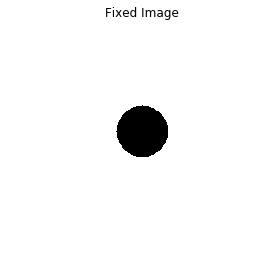


===== Image Information =====
Pixel type: 		32-bit float
Pixel channels: 	1
Dimensions: 		2
Size: 			(256, 256)
Length (mm): 		(1.0, 1.0)
Total Elements: 	65536



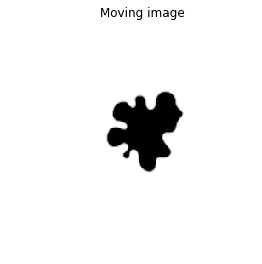

In [2]:
fixed_image = sitk.ReadImage('images/circle.png', sitk.sitkFloat32)
moving_image = sitk.ReadImage('images/splash.png', sitk.sitkFloat32)

print(image_info(fixed_image))
imshow_2d(fixed_image, 'Fixed Image')

print(image_info(moving_image))
imshow_2d(moving_image, 'Moving image')

In [3]:
def demons_registration(fixed_image, moving_image, 
                    interpolator = sitk.sitkLinear, num_iterations = 50, 
                    learning_rate = 1.5, plot = True):
    '''
    Image regristration with the Demons algorithm
    Input:
        fixed_image: sitk.Image
        moving_image: sitk.Image
    Output:
        sitk.Transform
    '''
    
    registration_method = sitk.ImageRegistrationMethod()

    # Create initial identity transformation.
    transform_to_displacment_field_filter = sitk.TransformToDisplacementFieldFilter()
    transform_to_displacment_field_filter.SetReferenceImage(fixed_image)
    
    # The image returned from the initial_transform_filter is transferred to the transform and cleared out.
    initial_transform = sitk.DisplacementFieldTransform(transform_to_displacment_field_filter.Execute(sitk.Transform(dimension, sitk.sitkIdentity)))
    
    # Regularization (update field - viscous, total field - elastic).
    initial_transform.SetSmoothingGaussianOnUpdate(varianceForUpdateField=0.0, varianceForTotalField=2.0) 
    
    # Set transform, intepolation and metric
    registration_method.SetInitialTransform(initial_transform)
    registration_method.SetInterpolator(interpolator)
    registration_method.SetMetricAsDemons(10) #intensities are equal if the difference is less than 10HU
        
    # Multi-resolution framework.            
    registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
#     registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[8,4,0])
#     registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[16,8,4])
    registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[12,6,3])
    
    # If you have time, run this code as is, otherwise switch to the gradient descent optimizer    
    #registration_method.SetOptimizerAsConjugateGradientLineSearch(learningRate=1.0, numberOfIterations=20, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
    registration_method.SetOptimizerAsGradientDescent(learningRate=learning_rate, 
        numberOfIterations=num_iterations, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
    registration_method.SetOptimizerScalesFromPhysicalShift()
    
    if plot:
        registration_method.AddCommand(sitk.sitkStartEvent, start_register_plot)
        registration_method.AddCommand(sitk.sitkEndEvent, end_register_plot)
        registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, 
                                       update_multires_iterations)
        registration_method.AddCommand(sitk.sitkIterationEvent, 
                                   lambda: plot_register_values(registration_method))
        
    return registration_method.Execute(fixed_image, moving_image)

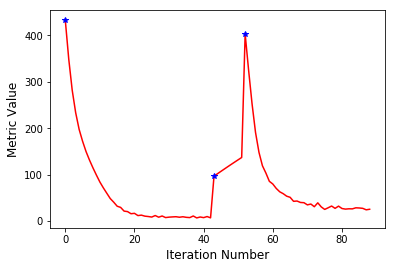

In [4]:
dimension = 2
transform_12 = demons_registration(fixed_image, moving_image)
# transform_21 = demons_registration(moving_image, fixed_image, dimension)
# print(transform_12)


In [5]:
print(transform_info(transform_12))


===== Transform Info =====
Transform type: 	GaussianSmoothingOnUpdateDisplacementFieldTransform
Dimensions: 		2
Parameters: 		(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

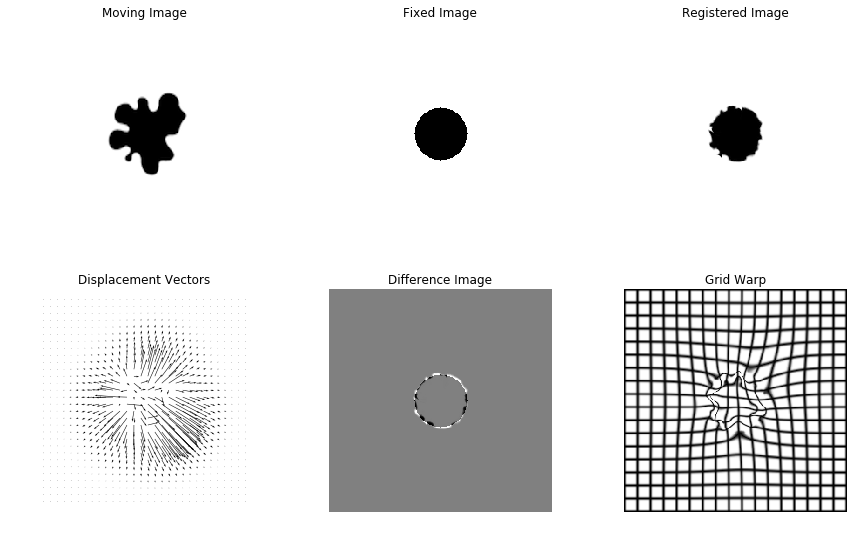

In [6]:


plot_registration(fixed_image, moving_image, transform_12, samples = 30)



===== Image Information =====
Pixel type: 		32-bit float
Pixel channels: 	1
Dimensions: 		2
Size: 			(150, 150)
Length (mm): 		(1.0, 1.0)
Total Elements: 	22500



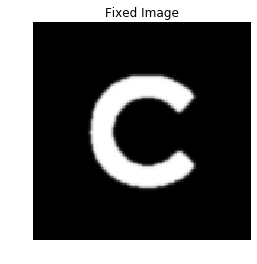


===== Image Information =====
Pixel type: 		32-bit float
Pixel channels: 	1
Dimensions: 		2
Size: 			(150, 150)
Length (mm): 		(1.0, 1.0)
Total Elements: 	22500



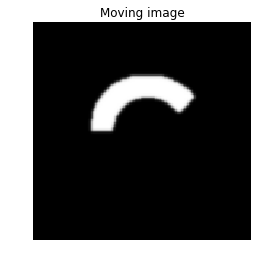

In [53]:
fixed_image = sitk.ReadImage('images/c.png', sitk.sitkFloat32)
moving_image = sitk.ReadImage('images/chalf.png', sitk.sitkFloat32)

print(image_info(fixed_image))
imshow_2d(fixed_image, 'Fixed Image')

print(image_info(moving_image))
imshow_2d(moving_image, 'Moving image')

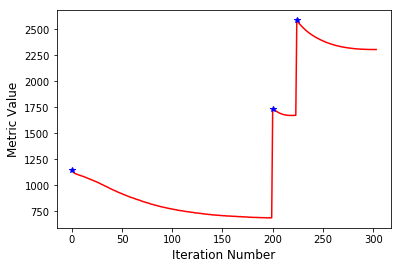

In [54]:
dimension = 2
transform_12 = demons_registration(fixed_image, moving_image, learning_rate=200.0,
                                  num_iterations = 200)

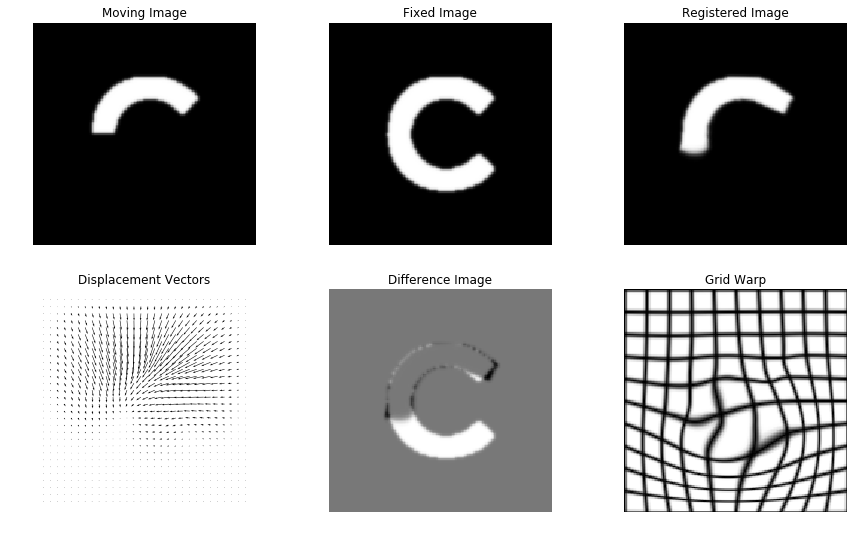

In [55]:
plot_registration(fixed_image, moving_image, transform_12, samples = 30)